In [4]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DistanceMetric
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [5]:
df_original=pd.read_csv("data\Mall_Customers.csv")
df=df_original.copy()

In [6]:
# df["aproved"]=np.zeros(shape=df.shape[0])

In [7]:
# df=pd.get_dummies(df,columns=["Genre"])
df["Genre"].loc[df["Genre"]=="Male"]=1
df["Genre"].loc[df["Genre"]=="Female"]=-1

C:\Users\Pichau\AppData\Local\Temp\ipykernel_22708\2358306858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"].loc[df["Genre"]=="Male"]=1
C:\Users\Pichau\AppData\Local\Temp\ipykernel_22708\2358306858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"].loc[df["Genre"]=="Female"]=-1


In [8]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,-1,20,16,6
3,4,-1,23,16,77
4,5,-1,31,17,40
5,6,-1,22,17,76
6,7,-1,35,18,6
7,8,-1,23,18,94
8,9,1,64,19,3
9,10,-1,30,19,72


In [9]:
df=df.astype(int)

In [10]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,-1,20,16,6
3,4,-1,23,16,77
4,5,-1,31,17,40
5,6,-1,22,17,76
6,7,-1,35,18,6
7,8,-1,23,18,94
8,9,1,64,19,3
9,10,-1,30,19,72


In [11]:
scaler=StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df),
                           columns=df.columns,
                           index=df.index)

c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciou

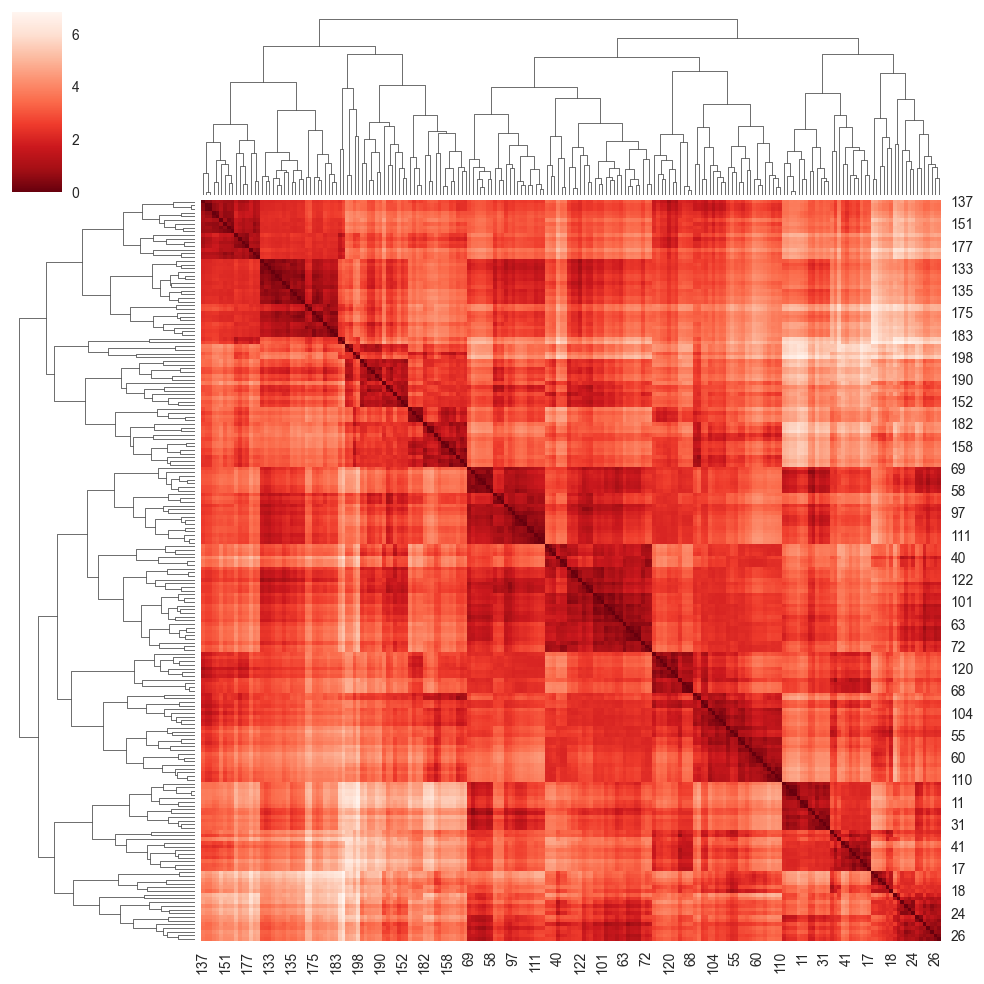

In [12]:
euclidean = DistanceMetric.get_metric('euclidean')

distances = euclidean.pairwise(scaled_data)
distances = pd.DataFrame(distances, 
                         columns=scaled_data.index,
                         index=scaled_data.index)

sns.clustermap(distances, cmap="Reds_r", figsize=(10, 10), method='average')

c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default va

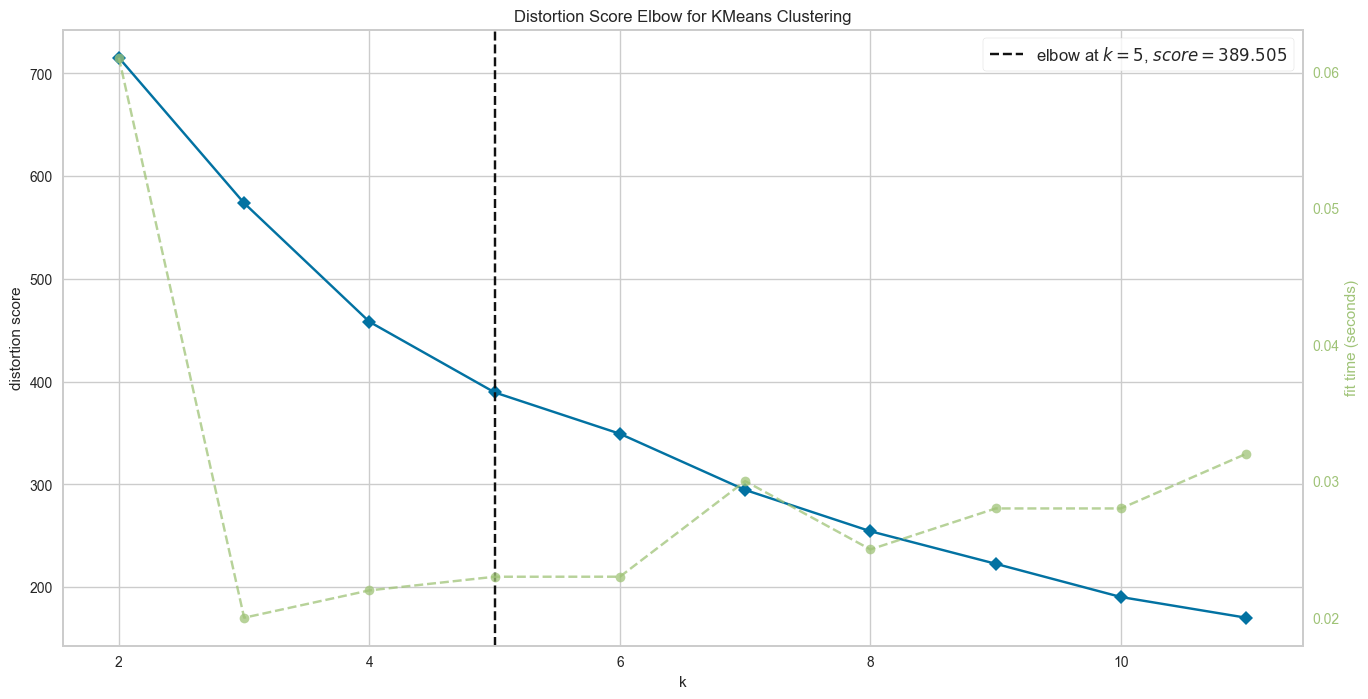

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()

fig, ax =plt.subplots(1, 1, figsize=(16, 8))
visualizer = KElbowVisualizer(model, k=(2, 12), ax=ax)
visualizer.fit(scaled_data)
visualizer.show()

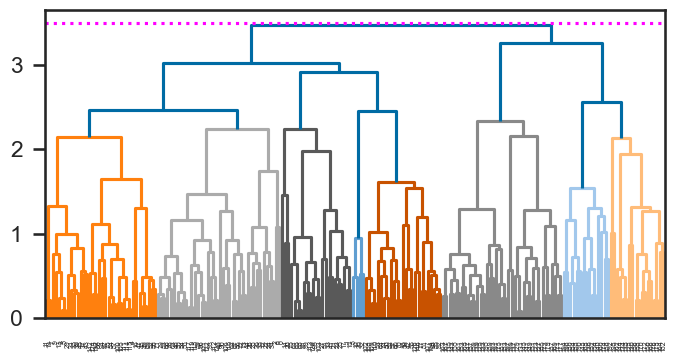

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

distance_threshold = 3.5

plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(scaled_data, method="average")
dendrogram = sch.dendrogram(linkage, labels=scaled_data.index, leaf_rotation=90)
ax.axhline(distance_threshold, color='magenta', ls=":")

In [15]:
model = KMeans(n_clusters=2)
model.fit(scaled_data)
clusters = model.predict(scaled_data)
df['cluster'] = clusters

df

c:\Users\Pichau\Desktop\Nova_Pasta\Nova_Pasta\Learn_machine_learn\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,-1,20,16,6,1
3,4,-1,23,16,77,1
4,5,-1,31,17,40,1
...,...,...,...,...,...,...
195,196,-1,35,120,79,0
196,197,-1,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


In [16]:
df.loc[df["cluster"]==0].loc[df["Genre"]==-1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
97,98,-1,27,60,50,0
100,101,-1,23,62,41,0
105,106,-1,21,62,42,0
111,112,-1,19,63,54,0
112,113,-1,38,64,42,0
114,115,-1,18,65,48,0
115,116,-1,19,65,50,0
117,118,-1,49,65,59,0
118,119,-1,51,67,43,0
119,120,-1,50,67,57,0


<Axes: xlabel='Genre', ylabel='cluster'>

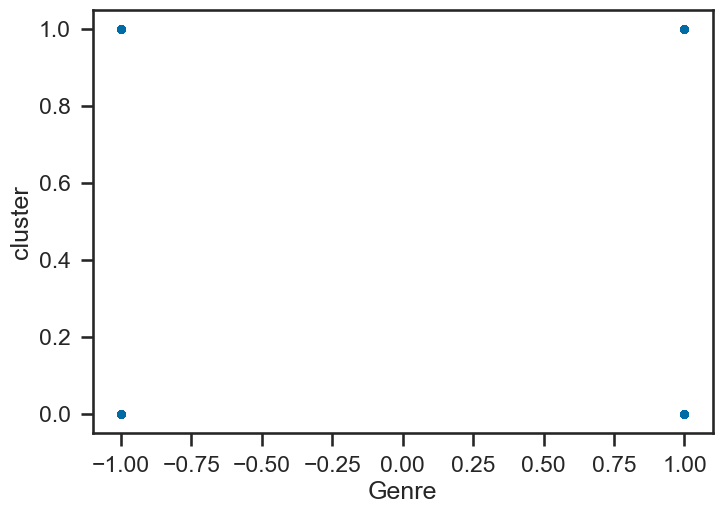

In [17]:
df.plot(x="Genre",y="cluster",kind="scatter")